In [1]:
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
activation_functions = {
    'relu': lambda x: np.maximum(0, x),
    'sigmoid': lambda x: 1 / (1 + np.exp(-x)),
    'linear': lambda x: x,
    'softmax': lambda x: np.exp(x) / np.sum(np.exp(x))
}

In [3]:
def read_model(filename):
    with open("testcase/" + filename, 'r') as file:
        data = json.load(file)
        model = data["case"]["model"]
        layers = data["case"]["model"]["layers"]
        weights = data["case"]["weights"]
        input_array = np.array(data["case"]["input"])
    return model,layers, weights, input_array

In [4]:
class FFNN:
    def __init__(self, input_array, layers):
        self.input_array = input_array
        self.layers = layers
        self.output = None

    def add_layer(self, neuron, function, weights, bias):
        layer = {
            'neuron': neuron,
            'function': function,
            'weights': weights,
            'bias': bias
        }
        self.layers.append(layer)

    def forward(self):
        self.output = self.input_array
        for layer in self.layers:
            weights = layer['weights']
            bias = layer['bias']
            function = activation_functions[layer['function']]
            self.output = function(np.dot(self.output, weights) + bias)
        print(self.output)
        return self.output

In [5]:
def visualizeGraph(model, weights, title):
    input_size = model['input_size']
    layer = model['layers']
    number_of_neurons = len(weights[0][0])
    G = nx.DiGraph()

    if (len(weights)==1):
        for i in range(input_size + 1):
            if (i==0):
                G.add_node(f'b{i}', layer=0)
            else:
                G.add_node(f'x{i}', layer=0)

        for i in range(number_of_neurons):
            G.add_node(f'o{i}', layer=1)

        for i in range(input_size + 1):
            for j in range(number_of_neurons):
                weight = weights[0][i][j]
                if (i==0):
                    G.add_edge(f'b{i}', f'o{j}', weight=weight)
                else:
                    G.add_edge(f'x{i}', f'o{j}', weight=weight)

    else:
        layers = 0
        for i in range(input_size + 1):
            if (i==0):
                G.add_node(f'b{i}', layer=0)
            else:
                G.add_node(f'x{i}', layer=0)

        for i in range(len(weights)-1):
            layers += 1
            G.add_node(f'b{i+1}',layer=layers)
            for j in range(len(weights[i][0])):
                G.add_node(f'h{i+1}{j+1}', layer=layers)

        layers += 1
        for i in range(len(output[0])):
            G.add_node(f'o{i}', layer=layers)

        bCount=0
        for i in range (len(weights)):
            for j in range (len(weights[i])):
                for k in range (len(weights[i][j])):
                    # print(f'i={i}, j={j}, k={k}')
                    if (j==0):
                        if (i==len(weights)-1):
                            G.add_edge(f'b{bCount}', f'o{k}', weight=weights[i][j][k])
                        else:
                            G.add_edge(f'b{bCount}', f'h{i+1}{k+1}', weight=weights[i][j][k])
                    else:
                        if (i==0):
                            G.add_edge(f'x{j}', f'h{i+1}{k+1}', weight=weights[i][j][k])
                        elif (i==len(weights)-1):
                            G.add_edge(f'h{i}{j}', f'o{k}', weight=weights[i][j][k])
                        else:
                            G.add_edge(f'h{i}{j}', f'h{i+1}{k+1}', weight=weights[i][j][k])
            bCount+=1


        
    pos = {}
    y_distance = 150  
    current_y = 0
    for node in G.nodes():
        layer = G.nodes[node]['layer']
        if layer not in pos:
            pos[layer] = {}
        if node.startswith('o'):
            pos[layer][node] = (layer, -len(pos[layer]) * y_distance)
        else:
            pos[layer][node] = (layer, -len(pos[layer]) * y_distance)

    final_pos = {node: pos[layer][node] if node in pos[layer] else default_pos[node] for layer in pos for node in pos[layer]}



    # Plot the graph
    plt.figure(figsize=(20,12)) 
    nx.draw(G, final_pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, edge_color='black', linewidths=1, arrows=True)
    edge_labels = {(i, j): f'{G[i][j]["weight"]:.2f}' for i, j in G.edges()} 
    nx.draw_networkx_edge_labels(G, final_pos, edge_labels=edge_labels, font_color='red', label_pos=0.8) 
    plt.title('Feedforward Neural Network')
    plt.savefig(f'{title}.png')
    plt.show()

[[0.76439061 0.21168068 0.02392871]]
Output: [[0.76439061 0.21168068 0.02392871]]


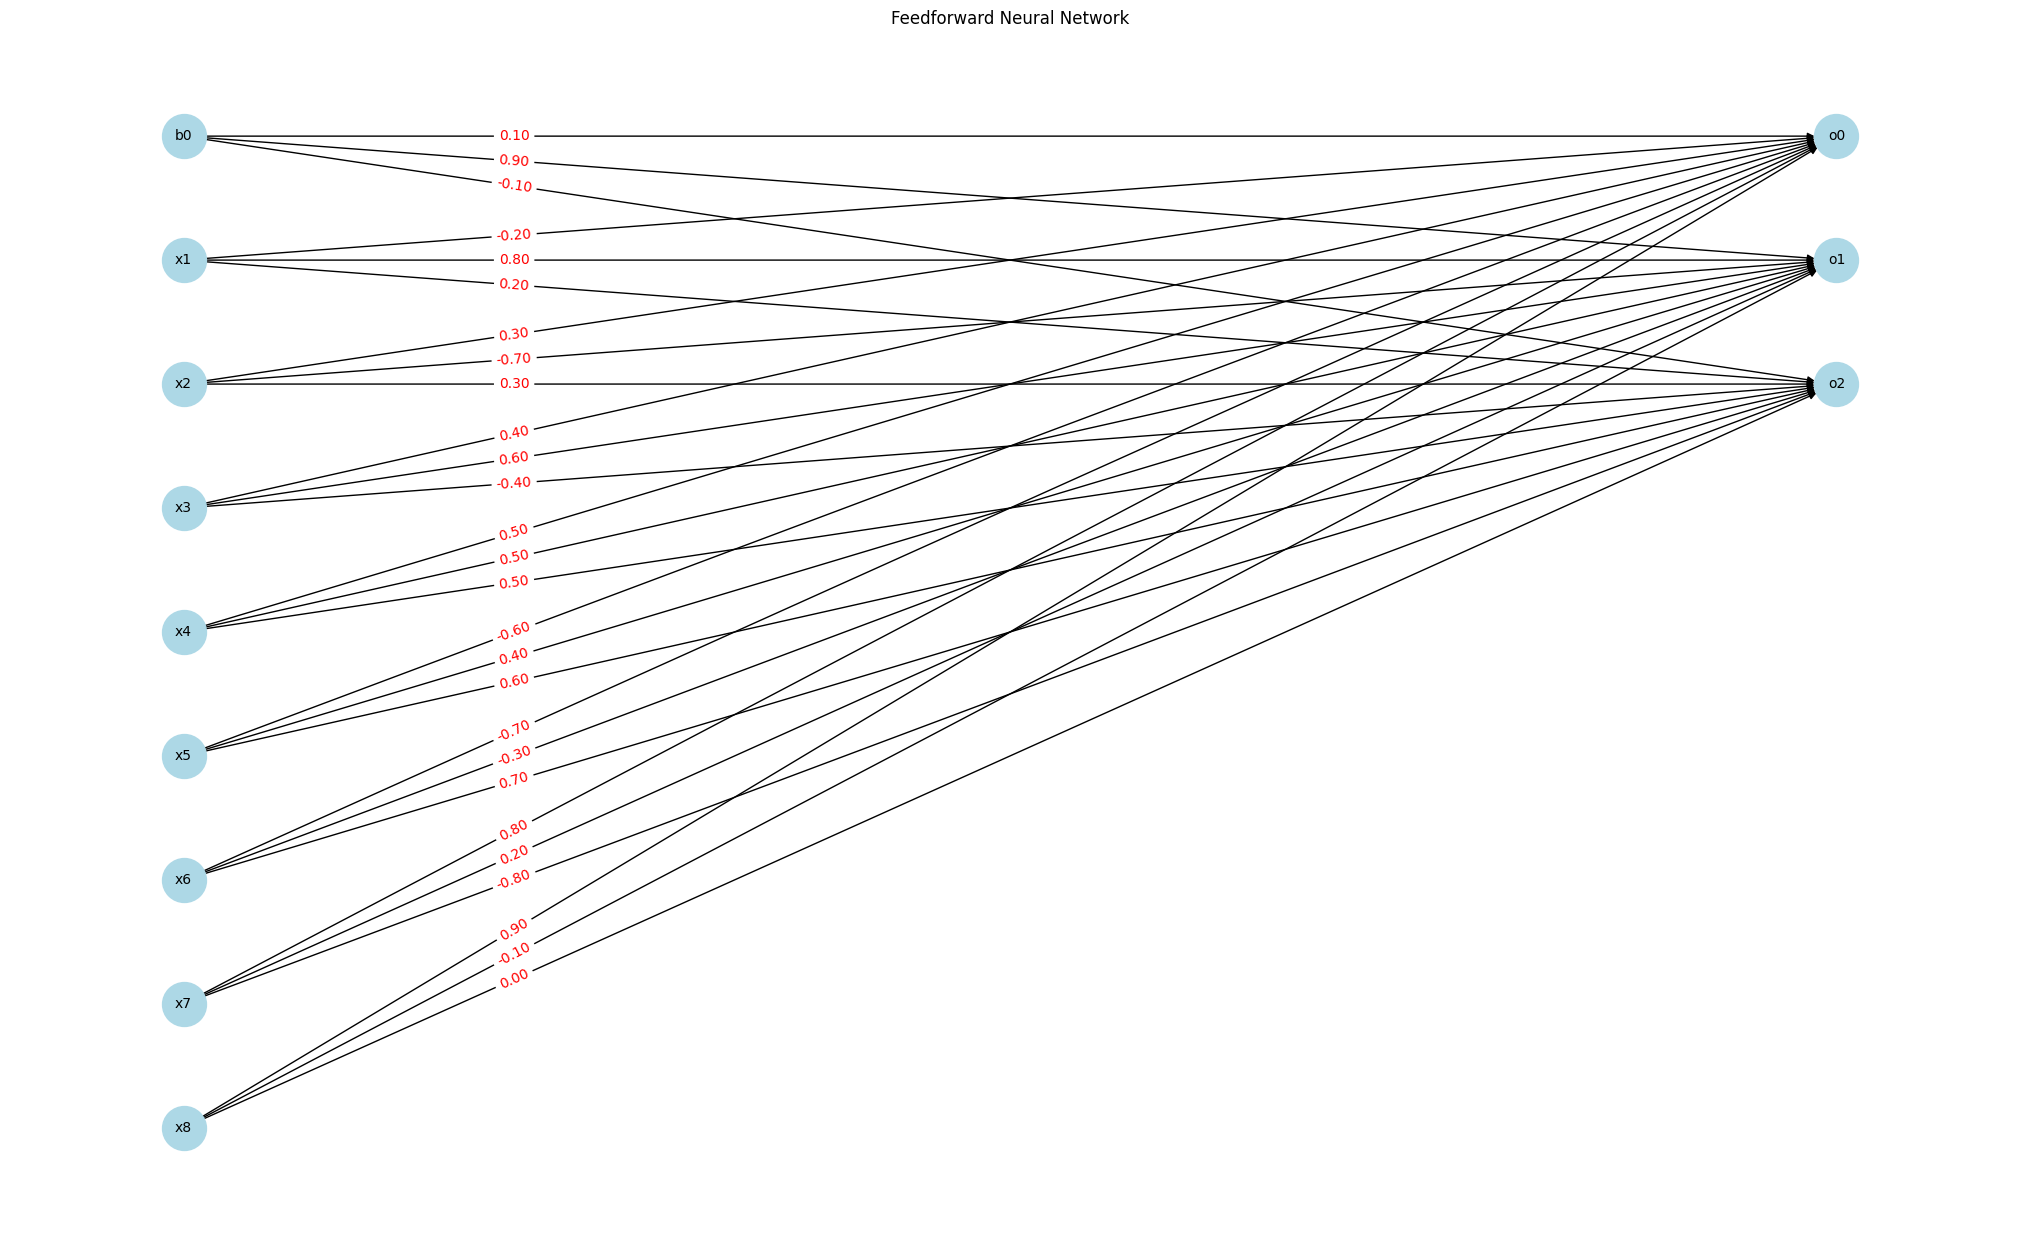

In [6]:
model_filename = input("Input the file model name: ")
model, layers, weights, input_array = read_model(model_filename)

ffnn = FFNN(input_array, [])
for layer, weight in zip(layers, weights):
    ffnn.add_layer(layer["number_of_neurons"], layer["activation_function"], np.array(weight[1:]), np.array(weight[0]))

output = ffnn.forward()
print("Output:", output)

visualizeGraph(model, weights, "model")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=620db8da-30e5-4498-b1a7-3d24bc2b369d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>